<a href="https://colab.research.google.com/github/Adarshmanepalli/Master_Thesis/blob/main/Master_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP 1 & 2 Performing landscape level predictions and generating MASK file

Mount drive, install package


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')
!pip install git+https://github.com/PatBall1/detectree2.git

  Cloning https://github.com/PatBall1/detectree2.git to /tmp/pip-req-build-f3d6r1lp
  Running command git clone --filter=blob:none --quiet https://github.com/PatBall1/detectree2.git /tmp/pip-req-build-f3d6r1lp
  Resolved https://github.com/PatBall1/detectree2.git to commit 2f29886bafcb63743a7f3ab596c5c3796ca4a243
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-lvwcvht4/detectron2_d41cf0e99ccb4161a97c8c7fac212eec
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-lvwcvht4/detectron2_d41cf0e99ccb4161a97c8c7fac212eec
  Resolved https://github.com/facebookresearch/detectron2.git to commit 70f454304e1a38378200459dd2dbca0f0f4a5ab4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━

## Tiling
Tile up the entire orthomosaic to make predictions

In [ ]:
import rasterio

site_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data"

img_path = site_path + "/RGBI/dop10rgbi_32_468_5764_1_nw_2022.tif"
#img_path = site_path + "/rgb/2016/Paracou_RGB_2016_10cm.tif"
tiles_path = site_path + "/tilespread_map_468_5764/"
model_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/models/urban_trees_Cambridge_20230630.pth"

# Read in the tiff file
data = rasterio.open(img_path)


In [ ]:
from detectree2.preprocessing.tiling import tile_data
buffer = 20 #30
tile_width = 45 #40
tile_height = 45 #40
tile_data(data, tiles_path, buffer, tile_width, tile_height, dtype_bool = True)

Tiling to 493 total tiles
Processed 50 tiles of 493 tiles
Processed 100 tiles of 493 tiles
Processed 150 tiles of 493 tiles
Processed 200 tiles of 493 tiles
Processed 250 tiles of 493 tiles
Processed 300 tiles of 493 tiles
Processed 350 tiles of 493 tiles
Processed 400 tiles of 493 tiles
Processed 450 tiles of 493 tiles
Tiling complete


## Create full site predictions

### Access pre-trained model

In [ ]:
from detectree2.models.train import MyTrainer, setup_cfg

# pretrained model?
trained_model = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/models/urban_trees_Cambridge_20230630.pth"

cfg = setup_cfg(update_model=trained_model) # update_model arg can be used to load in trained  model

Make predictions!

In [ ]:
from detectree2.models.predict import predict_on_data
from detectron2.engine import DefaultPredictor
#cfg.MODEL.DEVICE='cpu'
predict_on_data(tiles_path, predictor=DefaultPredictor(cfg))

Predicting 484 files
Predicted 50 files of 484
Predicted 100 files of 484
Predicted 150 files of 484
Predicted 200 files of 484
Predicted 250 files of 484
Predicted 300 files of 484


/usr/local/lib/python3.10/dist-packages/detectron2/layers/wrappers.py:142: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  x = F.conv2d(


Predicted 350 files of 484
Predicted 400 files of 484
Predicted 450 files of 484


/usr/local/lib/python3.10/dist-packages/detectron2/layers/wrappers.py:142: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  x = F.conv2d(


Here we reproject predictions into geographical space

In [ ]:
from detectree2.models.outputs import project_to_geojson
project_to_geojson(tiles_path, tiles_path + "predictions/", tiles_path + "predictions_geo/")

Projecting 484 files
Projecting file 50 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468090_5764225_45_20_25832.json
Projecting file 100 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468180_5764495_45_20_25832.json
Projecting file 150 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468270_5764765_45_20_25832.json
Projecting file 200 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468405_5764045_45_20_25832.json
Projecting file 250 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468495_5764315_45_20_25832.json
Proje

Combine predictions into full output

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from detectree2.models.outputs import stitch_crowns, clean_crowns
#name = "Paracou"
folder = tiles_path+ "/predictions_geo"
crowns = stitch_crowns(folder, 1)


Stitching file 50 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions_geo/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468090_5764225_45_20_25832.geojson
Stitching file 100 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions_geo/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468180_5764495_45_20_25832.geojson
Stitching file 150 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions_geo/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468270_5764765_45_20_25832.geojson
Stitching file 200 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions_geo/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468405_5764045_45_20_25832.geojson
Stitching file 250 of 484: /content/drive/Othercomputers/ROG/detectree2-1.0.8/data/tilespread_map_468_5764/predictions_geo/Prediction_dop10rgbi_32_468_5764_1_nw_2022_468495_5764315_45_20_25832.geoj

Remove invalid geometries before cleaning. Might be a way to fix them rather than remove all together but I think the ones with invalid geometries tend to be bad crowns anyway.

In [ ]:
crowns = crowns[crowns.is_valid]
# Simplify crowns to help with editing
crowns = crowns.set_geometry(crowns.simplify(0.3))
crowns

,Confidence_score,geometry
0,0.940230,"POLYGON ((468048.750 5764011.650, 468048.150 5..."
1,0.939189,"POLYGON ((468012.250 5764009.950, 468010.450 5..."
2,0.876493,"POLYGON ((468015.050 5764013.650, 468014.150 5..."
3,0.811810,"POLYGON ((468053.650 5764044.650, 468052.050 5..."
4,0.799574,"POLYGON ((468053.750 5764033.050, 468052.550 5..."
...,...,...
19152,0.053377,"POLYGON ((468951.950 5764943.850, 468950.850 5..."
19153,0.053064,"POLYGON ((468949.550 5764936.650, 468949.050 5..."
19154,0.053045,"POLYGON ((468956.150 5764945.650, 468954.850 5..."
19155,0.052950,"POLYGON ((468985.750 5764944.950, 468984.950 5..."


Clean overlapping crowns. For significant overlaps, the most confident crown is selected. IoU can be varied based on how strict you want the filtering to be.

In [ ]:
crowns = clean_crowns(crowns, 0.6)
crowns.to_file(site_path + "/finalcrowns/crowns_map_468_5764.gpkg")

Cleaning 18787 crowns
0 / 18787 crowns cleaned
1000 / 18787 crowns cleaned
2000 / 18787 crowns cleaned
3000 / 18787 crowns cleaned
4000 / 18787 crowns cleaned
5000 / 18787 crowns cleaned
6000 / 18787 crowns cleaned
7000 / 18787 crowns cleaned
8000 / 18787 crowns cleaned
9000 / 18787 crowns cleaned
10000 / 18787 crowns cleaned
11000 / 18787 crowns cleaned
12000 / 18787 crowns cleaned
13000 / 18787 crowns cleaned
14000 / 18787 crowns cleaned
15000 / 18787 crowns cleaned
16000 / 18787 crowns cleaned
17000 / 18787 crowns cleaned
18000 / 18787 crowns cleaned


# STEP 3 Convert the above genrated .GPKG file to .SHP file

In [ ]:
# Install necessary packages
#!pip install geopandas shapely

import os
import geopandas as gpd
from shapely.geometry import Point

# Define the output directory
output_directory = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/centerpoints/468_5764"

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Load the crowns_map.gpkg file
crowns_gdf = gpd.read_file("/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/finalcrowns/crowns_map_468_5764.gpkg")

# Calculate the center points of each polygon
crowns_gdf['center'] = crowns_gdf.geometry.centroid

# Create a new GeoDataFrame with the center points
centers_gdf = gpd.GeoDataFrame(geometry=crowns_gdf['center'], crs=crowns_gdf.crs)

# Save the center points to a new SHP file
centers_gdf.to_file(os.path.join(output_directory, "center_points_468_5764.shp"))

print("Center points SHP file has been created.")


Center points SHP file has been created.


In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 20.2 MB/s eta 0:00:00


# STEP 4 Snipping Tiles Using SHP file

In [ ]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window
import geopandas as gpd
from PIL import Image

# Function to snip a tile centered on a point
def snip_tile(src, x_center, y_center, tile_size, output_directory, idx):
    col, row = src.index(x_center, y_center)  # Convert coords to pixel positions

    # Calculate offsets to ensure the window does not exceed the image boundaries
    col_off = max(col - tile_size // 2, 0)
    row_off = max(row - tile_size // 2, 0)
    col_end = min(col + tile_size // 2, src.width)
    row_end = min(row + tile_size // 2, src.height)

    # Adjust the window size if near the edge
    width = col_end - col_off
    height = row_end - row_off

    window = Window(row_off,col_off, width, height)
    print(f"Processing tile at Pixel coordinates: {col}, {row}, Window offset (col, row): {window.col_off}, {window.row_off}")

    data = src.read(window=window, out_shape=(src.count, tile_size, tile_size), resampling=rasterio.enums.Resampling.bilinear)
    out_meta = src.meta.copy()
    out_meta.update({
        "driver": "GTiff",
        "height": tile_size,
        "width": tile_size,
        "transform": rasterio.windows.transform(window, src.transform)
    })

    # Save the tile as a new TIF file
    tile_path = os.path.join(output_directory, f"tile_{idx}.tif")
    with rasterio.open(tile_path, "w", **out_meta) as dst:
        for band in range(1, src.count + 1):
            dst.write(data[band - 1, :, :], band)

# Load the SHP file with center points
centers_gdf = gpd.read_file("/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/centerpoints/center_points_467_5764.shp")
assert centers_gdf.crs.to_string() == 'EPSG:25832', "CRS mismatch. Please check the CRS of your SHP file."

# Open the orthophoto TIF image
tif_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/RGBI/dop10rgbi_32_467_5764_1_nw_2022.tiff"
output_dir = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/V3RGBI_tiles_466_5764"
os.makedirs(output_dir, exist_ok=True)

tile_size = 128  # Desired tile size, can adjust as needed

with rasterio.open(tif_path) as src:
    for idx, row in centers_gdf.iterrows():
        x, y = row.geometry.x, row.geometry.y
        snip_tile(src, x, y, tile_size, output_dir, idx)

print("Tiles have been created.")


Processing tile at Pixel coordinates: 9393, 147, Window offset (col, row): 83, 9329
Processing tile at Pixel coordinates: 9474, 308, Window offset (col, row): 244, 9410
Processing tile at Pixel coordinates: 9938, 542, Window offset (col, row): 478, 9874
Processing tile at Pixel coordinates: 9476, 193, Window offset (col, row): 129, 9412
Processing tile at Pixel coordinates: 9614, 535, Window offset (col, row): 471, 9550
Processing tile at Pixel coordinates: 9677, 10, Window offset (col, row): 0, 9613
Processing tile at Pixel coordinates: 9576, 561, Window offset (col, row): 497, 9512
Processing tile at Pixel coordinates: 9386, 239, Window offset (col, row): 175, 9322
Processing tile at Pixel coordinates: 9845, 531, Window offset (col, row): 467, 9781
Processing tile at Pixel coordinates: 9423, 151, Window offset (col, row): 87, 9359
Processing tile at Pixel coordinates: 9567, 207, Window offset (col, row): 143, 9503
Processing tile at Pixel coordinates: 9726, 581, Window offset (col, r

In [ ]:
pip install pyproj

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Script to Convert RGBI tiles to npy file to feed it to AI and also extract the coordinates and save them into a seperate CSV file

> ---> The coordinates are not accurate so we won't be using the coordinates outputed from here



In [ ]:
import os
import numpy as np
import rasterio
import csv
from pyproj import Transformer
from concurrent.futures import ProcessPoolExecutor

def process_tile(tile_path, transformer):
    with rasterio.open(tile_path) as src:
        # Reads all bands into memory and rearranges them to (height, width, bands)
        data = src.read()  # Data shape will be (4, 128, 128)
        data = np.moveaxis(data, 0, -1)  # Change to (128, 128, 4)

        # Get center coordinates and transform to WGS84
        center_x, center_y = src.xy(src.height // 2, src.width // 2)
        lon, lat = transformer.transform(center_x, center_y)

    return data, lat, lon

def write_data_to_csv(csv_writer, idx, lat, lon):
    csv_writer.writerow([idx, lat, lon])  # Write index and coordinates to CSV

def convert_tiles_to_single_npy_and_csv(input_dir, output_npy_path, csv_output_path):
    transformer = Transformer.from_crs('epsg:25832', 'epsg:4326', always_xy=True)

    tile_files = [f for f in os.listdir(input_dir) if f.endswith('.tif')]
    tile_files.sort()  # Sorting files to ensure consistent order

    # Preparing to write coordinates to CSV
    with open(csv_output_path, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Index', 'Latitude', 'Longitude'])

        # Setting up multiprocessing
        with ProcessPoolExecutor() as executor:
            # Submitting jobs to the process pool
            futures = {executor.submit(process_tile, os.path.join(input_dir, tile), transformer): tile for tile in tile_files}
            results = []

            for future in as_completed(futures):
                tile = futures[future]
                try:
                    data, lat, lon = future.result()  # Collecting results from processes
                    idx = tile_files.index(tile)  # Get the index based on the tile name
                    results.append((idx, data, lat, lon))  # Append results with index
                    print(f"Processed {tile} (Index: {idx})")
                except Exception as e:
                    print(f"Failed to process {tile}: {e}")

            # Sort results by index (ensures correct order in npy file)
            results.sort(key=lambda x: x[0])
            # Write to CSV and aggregate data arrays
            all_tiles = [x[1] for x in results]
            for res in results:
                write_data_to_csv(csv_writer, *res[0:3])

        # Aggregating all tile data into a single NumPy array and saving to .npy
        all_tiles_array = np.stack(all_tiles)
        np.save(output_npy_path, all_tiles_array)
        print(f"All tiles have been saved to {output_npy_path}")

# Specifying directories and calling the function
input_directory = '/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/RGBI_tiles_466_5764'
output_npy_file = '/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/all_RGBI_tiles_466_5764.npy'
csv_output_file = '/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/RGBI_tile_coordinates.csv'

convert_tiles_to_single_npy_and_csv(input_directory, output_npy_file, csv_output_file)


KeyboardInterrupt: 

#STEP 5 Prediction using CustomCNN with Confidence Threshold

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

# Define paths
input_file_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/PC_RGBI_466_5764_tiles.npy"
model_path = "/content/drive/MyDrive/MainDataFolder/AIModels/V2RGBI_Only_128x128_2500_combined_model.h5"
output_csv_path = "/content/drive/MyDrive/MainDataFolder/AIModels/predicted_species_using_CustomCNN_with_confidence_40per.csv"

# Define the threshold for unknown species
confidence_threshold = 0.4

# Load the input data
print("Loading input data...")
input_data = np.load(input_file_path)
print(f"Loaded input data with shape {input_data.shape}")

# Downsample the images to 64x64 and keep all 4 bands (RGBI)
print("Downsampling images to 64x64...")
input_data_resized = np.array([resize(img, (64, 64)).numpy() for img in input_data])
print(f"Downsampled images shape: {input_data_resized.shape}")

# Normalize the images
input_data_resized = input_data_resized.astype('float32') / 255.0

# Load the trained model
print("Loading the model...")
model = load_model(model_path)

# Predict the species
print("Predicting species...")
preds = model.predict(input_data_resized, batch_size=32)
preds_confidences = np.max(preds, axis=1)
preds_labels = np.argmax(preds, axis=1)

# Decode the predicted labels to species names
species = ['Quercus_robur', 'Carpinus_betulus', 'Acer_campestre', 'Tilia_cordata',
           'Betula_pendula', 'Alnus_glutinosa', 'Acer_pseudoplatanus',
           'Fagus_sylvatica', 'Fraxinus_excelsior', 'Acer_platanoides']
label_encoder = LabelEncoder()
label_encoder.fit(species)

# Apply threshold to mark predictions as unknown
predicted_species = []
for i, confidence in enumerate(preds_confidences):
    if confidence < confidence_threshold:
        predicted_species.append("Unknown Species")
    else:
        predicted_species.append(label_encoder.inverse_transform([preds_labels[i]])[0])

# Create a DataFrame with the index, predicted species, and confidence
results_df = pd.DataFrame({
    'Index': range(len(predicted_species)),
    'Predicted_Species': predicted_species,
    'Confidence': preds_confidences
})

# Save the results to a CSV file
print(f"Saving results to {output_csv_path}...")
results_df.to_csv(output_csv_path, index=False)
print("Results saved successfully.")


Loading input data...
Loaded input data with shape (6046, 128, 128, 4)
Downsampling images to 64x64...
Downsampled images shape: (6046, 64, 64, 4)
Loading the model...


Predicting species...
189/189 [==============================] - 1s 2ms/step
Saving results to /content/drive/MyDrive/MainDataFolder/AIModels/predicted_species_using_CustomCNN_with_confidence_40per.csv...
Results saved successfully.


# *Sample Prediction scripts* **NOT INCLUDED IN THESIS**

## *NOT INCLUDED IN THESIS REPORT*

###Predict using Resnet50 Model

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

# Define paths
input_file_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/PC_NPY_FILES/PC_RGBI_467_5764_tiles.npy"
model_path = "/content/drive/MyDrive/MainDataFolder/AIModels/resnet50_2500NO_KH_BD_combined_model.h5"
output_csv_path = "/content/drive/MyDrive/MainDataFolder/AIModels/PredictedSpeciesCSV/RGBI_467_5764_predicted_species.csv"

# Load the input data
print("Loading input data...")
input_data = np.load(input_file_path)
print(f"Loaded input data with shape {input_data.shape}")

# Downsample the images to 64x64 and take only the first 3 bands (RGB)
print("Downsampling images to 64x64 and selecting RGB bands...")
input_data_resized = np.array([resize(img[:, :, :3], (64, 64)).numpy() for img in input_data])
print(f"Downsampled images shape: {input_data_resized.shape}")

# Normalize the images
input_data_resized = input_data_resized.astype('float32') / 255.0

# Load the trained model
print("Loading the model...")
model = load_model(model_path)

# Predict the species
print("Predicting species...")
preds = model.predict(input_data_resized, batch_size=32)
preds_labels = np.argmax(preds, axis=1)

# Decode the predicted labels to species names
species = ['Quercus_robur', 'Carpinus_betulus', 'Acer_campestre', 'Tilia_cordata',
           'Betula_pendula', 'Alnus_glutinosa', 'Acer_pseudoplatanus',
           'Fagus_sylvatica', 'Fraxinus_excelsior', 'Acer_platanoides']
label_encoder = LabelEncoder()
label_encoder.fit(species)
predicted_species = label_encoder.inverse_transform(preds_labels)

# Create a DataFrame with the index and predicted species
results_df = pd.DataFrame({
    'Index': range(len(predicted_species)),
    'Predicted_Species': predicted_species
})

# Save the results to a CSV file
print(f"Saving results to {output_csv_path}...")
results_df.to_csv(output_csv_path, index=False)
print("Results saved successfully.")


Loading input data...
Loaded input data with shape (4329, 128, 128, 4)
Downsampling images to 64x64 and selecting RGB bands...
Downsampled images shape: (4329, 64, 64, 3)
Loading the model...
Predicting species...
 67/136 [=============>................] - ETA: 38s

###Predict using Custom CNN model

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

# Define paths
input_file_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/PC_RGBI_466_5764_tiles.npy"
model_path = "/content/drive/MyDrive/MainDataFolder/AIModels/V2RGBI_Only_128x128_2500_combined_model.h5"
output_csv_path = "/content/drive/MyDrive/MainDataFolder/AIModels/predicted_species.csv"

# Load the input data
print("Loading input data...")
input_data = np.load(input_file_path)
print(f"Loaded input data with shape {input_data.shape}")

# Downsample the images to 64x64 and take only the first 3 bands (RGB)
print("Downsampling images to 64x64 and selecting RGB bands...")
input_data_resized = np.array([resize(img[:, :, :3], (64, 64)).numpy() for img in input_data])
print(f"Downsampled images shape: {input_data_resized.shape}")

# Normalize the images
input_data_resized = input_data_resized.astype('float32') / 255.0

# Load the trained model
print("Loading the model...")
model = load_model(model_path)

# Predict the species
print("Predicting species...")
preds = model.predict(input_data_resized, batch_size=32)
preds_labels = np.argmax(preds, axis=1)

# Decode the predicted labels to species names
species = ['Quercus_robur', 'Carpinus_betulus', 'Acer_campestre', 'Tilia_cordata',
           'Betula_pendula', 'Alnus_glutinosa', 'Acer_pseudoplatanus',
           'Fagus_sylvatica', 'Fraxinus_excelsior', 'Acer_platanoides']
label_encoder = LabelEncoder()
label_encoder.fit(species)
predicted_species = label_encoder.inverse_transform(preds_labels)

# Create a DataFrame with the index and predicted species
results_df = pd.DataFrame({
    'Index': range(len(predicted_species)),
    'Predicted_Species': predicted_species
})

# Save the results to a CSV file
print(f"Saving results to {output_csv_path}...")
results_df.to_csv(output_csv_path, index=False)
print("Results saved successfully.")


### Prediction using Resnet50 but this time it also include Confidence Threshold

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.image import resize
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

# Define paths
input_file_path = "/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/PC_NPY_FILES/PC_RGBI_467_5764_tiles.npy"
model_path = "/content/drive/MyDrive/MainDataFolder/AIModels/resnet50_2500NO_KH_BD_combined_model.h5"
output_csv_path = "/content/drive/MyDrive/MainDataFolder/AIModels/PredictedSpeciesCSV/predicted_species_using_ResNet50_with_confidence_60per.csv"

# Define the threshold for unknown species
confidence_threshold = 0.6

# Load the input data
print("Loading input data...")
input_data = np.load(input_file_path)
print(f"Loaded input data with shape {input_data.shape}")

# Downsample the images to 64x64 and take only the first 3 bands (RGB)
print("Downsampling images to 64x64 and selecting RGB bands...")
input_data_resized = np.array([resize(img[:, :, :3], (64, 64)).numpy() for img in input_data])
print(f"Downsampled images shape: {input_data_resized.shape}")

# Normalize the images
input_data_resized = input_data_resized.astype('float32') / 255.0

# Load the trained model
print("Loading the model...")
model = load_model(model_path)

# Predict the species
print("Predicting species...")
preds = model.predict(input_data_resized, batch_size=32)
preds_confidences = np.max(preds, axis=1)
preds_labels = np.argmax(preds, axis=1)

# Decode the predicted labels to species names
species = ['Quercus_robur', 'Carpinus_betulus', 'Acer_campestre', 'Tilia_cordata',
           'Betula_pendula', 'Alnus_glutinosa', 'Acer_pseudoplatanus',
           'Fagus_sylvatica', 'Fraxinus_excelsior', 'Acer_platanoides']
label_encoder = LabelEncoder()
label_encoder.fit(species)

# Apply threshold to mark predictions as unknown
predicted_species = []
for i, confidence in enumerate(preds_confidences):
    if confidence < confidence_threshold:
        predicted_species.append("Unknown Species")
    else:
        predicted_species.append(label_encoder.inverse_transform([preds_labels[i]])[0])

# Create a DataFrame with the index, predicted species, and confidence
results_df = pd.DataFrame({
    'Index': range(len(predicted_species)),
    'Predicted_Species': predicted_species,
    'Confidence': preds_confidences
})

# Save the results to a CSV file
print(f"Saving results to {output_csv_path}...")
results_df.to_csv(output_csv_path, index=False)
print("Results saved successfully.")


Loading input data...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/PC_NPY_FILES/PC_RGBI_467_5764_tiles.npy'

#Code to convert the SHP file to CSV (Index, Longitude,Latitude)

In [ ]:
import geopandas as gpd
import pandas as pd

def shp_to_csv(shp_file_path, csv_file_path):
    # Read the shapefile
    gdf = gpd.read_file(shp_file_path)

    # Ensure the shapefile is in WGS84 format
    if gdf.crs.to_string() != 'EPSG:4326':
        print("Warning: The input shapefile is not in WGS84 format. Transforming to WGS84...")
        gdf = gdf.to_crs(epsg=4326)

    # Extract coordinates and index
    gdf['Longitude'] = gdf.geometry.x
    gdf['Latitude'] = gdf.geometry.y
    gdf['Index'] = gdf.index

    # Create a DataFrame with the required columns
    df = gdf[['Index', 'Latitude', 'Longitude']]

    # Write to CSV
    df.to_csv(csv_file_path, index=False)
    print(f"CSV file has been created at: {csv_file_path}")

# Specify the input SHP file and the output CSV file paths
shp_file_path = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/centerpoints/WS84/468_5764 - WS84/center_points_468_5764_WS84.shp'  # Change this to your shapefile path
csv_file_path = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/PC_RGBI_Coordinates_CSV_V2/PC_RGBI_468_5764_coordinates.csv'  # Change this to your desired CSV file path

shp_to_csv(shp_file_path, csv_file_path)


# STEP 6 Code to combine the CSV ( Geolocation ) with Predicted Species .csv file

In [ ]:
import pandas as pd

def merge_csv_files(file1, file2, output_file):
    # Read the CSV files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    # Check if both files have the same number of rows
    if len(df1) != len(df2):
        raise ValueError("The input files must have the same number of rows")

    # Remove duplicate columns from df2 that are already in df1
    df2 = df2.loc[:, ~df2.columns.isin(df1.columns)]

    # Merge the dataframes by concatenating columns
    merged_df = pd.concat([df1, df2], axis=1)

    # Write the merged dataframe to a new CSV file
    merged_df.to_csv(output_file, index=False)
    print(f"Merged file saved as {output_file}")

# Example usage
file1 = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/PC_RGBI_Coordinates_CSV_V2/PC_RGBI_467_5764_coordinates.csv'
file2 = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/PredictedSpeciesCSV/ResNet50_467_5764_with_confidence_60per.csv'
output_file = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/mergedCSVs_V2/RN50_467_5764_CONF60_MERG_4_UE5_conversion.csv'

# Example usage for PC
#file1 = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/PC_RGBI_466_5764_coordinates.csv'
#file2 = 'F:/V2_predicted_species.csv'
#output_file = 'F:/merged_file_for_UE5_conversion.csv'


merge_csv_files(file1, file2, output_file)


# STEP 7 Code Snippet to Convert GeoLocation to UE5 World Coordinates

In [ ]:
import pandas as pd

# Load Data from CSV
input_csv_path = 'C:/Users/adars/Downloads/coordinates_with_species.csv'
output_csv_path = 'C:/Users/adars/Downloads/converted_to_UE_coord_with_species.csv'
data = pd.read_csv(input_csv_path)

# Geographic Bounding Box
GeoMinX = 8.518931864
GeoMaxX = 8.533602702
GeoMinY = 52.025647561
GeoMaxY = 52.034696768

# Unreal Engine Bounding Box
UE_MinX = -50400
UE_MaxX = -25200
UE_MinY = 0
UE_MaxY = 25200

# Normalize and Convert
data['NormalizedX'] = (data['X'] - GeoMinX) / (GeoMaxX - GeoMinX)
data['NormalizedY'] = 1 - ((data['Y'] - GeoMinY) / (GeoMaxY - GeoMinY))  # Inverting Y

data['UnrealX'] = UE_MinX + (UE_MaxX - UE_MinX) * data['NormalizedX']
data['UnrealY'] = UE_MinY + (UE_MaxY - UE_MinY) * data['NormalizedY']

# Include Species in the output CSV
data[['UnrealX', 'UnrealY', 'Species']].to_csv(output_csv_path, index=False)



## PC Version

In [ ]:
import pandas as pd

# Load Data from CSV
input_csv_path = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/mergedCSVs_V2/RN50_467_5764_CONF60_MERG_4_UE5_conversion.csv'
output_csv_path = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/UE_CONV_CSVs_V2/RN50_467_5764_CONF60_UE5_converted.csv'
data = pd.read_csv(input_csv_path)

# Geographic Bounding Box
GeoMinX = 8.518931864
GeoMaxX = 8.533602702
GeoMinY = 52.025647561
GeoMaxY = 52.034696768

# Unreal Engine Bounding Box
UE_MinX = -50400
UE_MaxX = -25200
UE_MinY = 0
UE_MaxY = 25200

# Normalize and Convert
data['NormalizedX'] = (data['Longitude'] - GeoMinX) / (GeoMaxX - GeoMinX)
data['NormalizedY'] = 1 - ((data['Latitude'] - GeoMinY) / (GeoMaxY - GeoMinY))  # Inverting Y

data['UnrealX'] = UE_MinX + (UE_MaxX - UE_MinX) * data['NormalizedX']
data['UnrealY'] = UE_MinY + (UE_MaxY - UE_MinY) * data['NormalizedY']

# Include Species in the output CSV
data[['UnrealX', 'UnrealY', 'Predicted_Species']].to_csv(output_csv_path, index=True) #set index to false if not needed index=False



##Code to Split the UE5 World Coordinates .csv file in 4 parts to ease the spawning of trees using Unreal Engine Blueprint

In [ ]:
import pandas as pd

def split_csv(file_path):
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Calculate the number of rows in each split
    num_rows = len(data)
    rows_per_part = num_rows // 4

    # Split the data into four parts and save each part
    for i in range(4):
        if i == 3:  # Handle last part to include all remaining rows
            part = data.iloc[i*rows_per_part:]
        else:
            part = data.iloc[i*rows_per_part:(i+1)*rows_per_part]

        # Reset index to start from 0 in each file
        part.reset_index(drop=True, inplace=True)

        # Save each part to a new file
        part.to_csv(f'part_{i+1}.csv', index=False)

if __name__ == "__main__":
    file_path = 'F:/TreeSATAI data/detectree2-1.0.8/detectree2-1.0.8/data/UE_CONV_CSVs_V2/RN50_467_5764_CONF60_UE5_converted.csv'  # Replace with the path to your CSV file
    split_csv(file_path)


# STEP 8 & 9 OF UNREAL ENGINE INCLUSION AND VISUALISATION

[UNREAL ENGINE 5.2.1 DEMO and BLUEPRINT](https://drive.google.com/file/d/1C7sobCShnmHzluW4AAyBvbc3P8aZ5m9w/view?usp=sharing)

#Detectree2 Evaluation *Comaprision with detected tree crowns and Ground truth data*

GT Polygon 0 matched with Detected Polygon with IoU: 0.2166154533616882
GT Polygon 1 matched with Detected Polygon with IoU: 0.4776319605597596
GT Polygon 2 matched with Detected Polygon with IoU: 0.40510244518199107
GT Polygon 3 matched with Detected Polygon with IoU: 0.3719646082774966
GT Polygon 4 matched with Detected Polygon with IoU: 0.6379586790577281
GT Polygon 5 matched with Detected Polygon with IoU: 0.48361020812342354
GT Polygon 6 matched with Detected Polygon with IoU: 0.3930479018232775
GT Polygon 7 matched with Detected Polygon with IoU: 0.3860070503924287
GT Polygon 8 matched with Detected Polygon with IoU: 0.31040360002367945
GT Polygon 9 matched with Detected Polygon with IoU: 0.17637019557861505
GT Polygon 10 matched with Detected Polygon with IoU: 0.4391088063982786
GT Polygon 11 matched with Detected Polygon with IoU: 0.39345116779563927
GT Polygon 12 matched with Detected Polygon with IoU: 0.5355389177034481
GT Polygon 13 matched with Detected Polygon with IoU: 0.

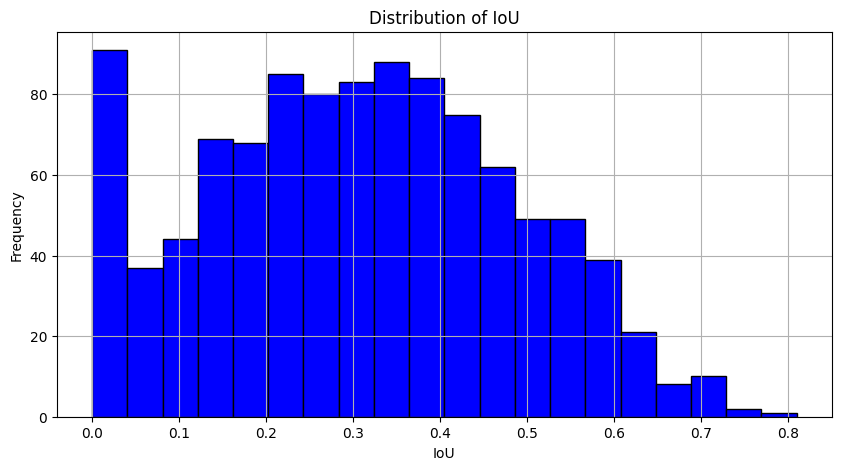

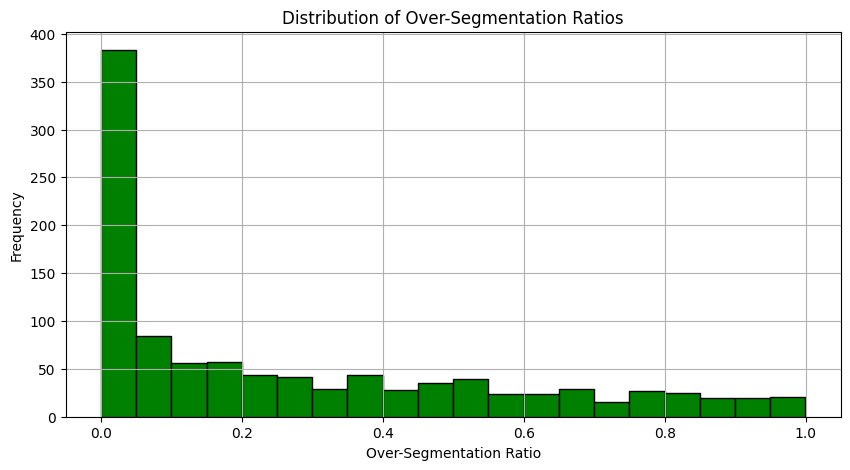

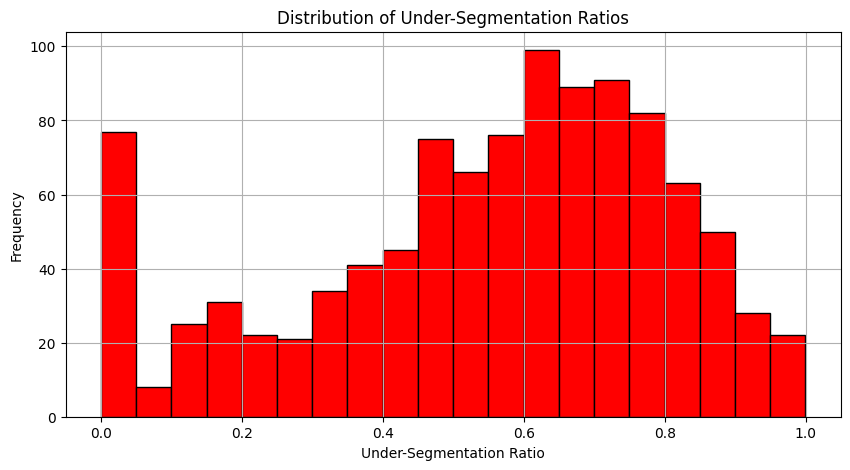

In [ ]:
# Step 1: Install necessary libraries
#!pip install geopandas shapely matplotlib

# Step 2: Import the necessary libraries
import geopandas as gpd
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

# Step 3: Load the ground truth and detected tree crown polygons
# Load ground truth polygons
ground_truth_gdf = gpd.read_file("/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/finalcrowns/reprojected_groundtruth_Mask_467_5764.gpkg")

# Load detected polygons
detected_gdf = gpd.read_file("/content/drive/Othercomputers/ROG/detectree2-1.0.8/data/finalcrowns/crowns_map_467_5764.gpkg")

# Step 4: Define evaluation functions
def calculate_iou(ground_truth, detected):
    intersection = ground_truth.intersection(detected).area
    union = ground_truth.union(detected).area
    return intersection / union

def calculate_oversegmentation_ratio(ground_truth, detected):
    return (detected.difference(ground_truth).area / detected.area) if detected.area != 0 else 0

def calculate_undersegmentation_ratio(ground_truth, detected):
    return (ground_truth.difference(detected).area / ground_truth.area) if ground_truth.area != 0 else 0

# Step 5: Perform evaluation with debugging
ious = []
oversegment_ratios = []
undersegment_ratios = []

for idx, gt_polygon in ground_truth_gdf.iterrows():
    max_iou = 0
    best_detected_polygon = None

    for jdx, detected_polygon in detected_gdf.iterrows():
        iou = calculate_iou(gt_polygon.geometry, detected_polygon.geometry)
        if iou > max_iou:
            max_iou = iou
            best_detected_polygon = detected_polygon.geometry

    if best_detected_polygon is not None:
        print(f"GT Polygon {idx} matched with Detected Polygon with IoU: {max_iou}")
        ious.append(max_iou)
        oversegment_ratios.append(calculate_oversegmentation_ratio(gt_polygon.geometry, best_detected_polygon))
        undersegment_ratios.append(calculate_undersegmentation_ratio(gt_polygon.geometry, best_detected_polygon))
    else:
        print(f"GT Polygon {idx} did not match with any Detected Polygon.")
        ious.append(0)
        oversegment_ratios.append(0)
        undersegment_ratios.append(0)

mean_iou = np.mean(ious)
mean_oversegmentation = np.mean(oversegment_ratios)
mean_undersegmentation = np.mean(undersegment_ratios)

print(f"Mean IoU: {mean_iou}")
print(f"Mean Over-Segmentation Ratio: {mean_oversegmentation}")
print(f"Mean Under-Segmentation Ratio: {mean_undersegmentation}")

# Step 6: Plot graphical representations
# Plot IoU distribution
plt.figure(figsize=(10, 5))
plt.hist(ious, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of IoU')
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot Over-Segmentation Ratio distribution
plt.figure(figsize=(10, 5))
plt.hist(oversegment_ratios, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Over-Segmentation Ratios')
plt.xlabel('Over-Segmentation Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot Under-Segmentation Ratio distribution
plt.figure(figsize=(10, 5))
plt.hist(undersegment_ratios, bins=20, color='red', edgecolor='black')
plt.title('Distribution of Under-Segmentation Ratios')
plt.xlabel('Under-Segmentation Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
